In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load your dataset
data = pd.read_csv('music_recommendation_dataset_with_separate_ranges.csv')

In [3]:
data.head()

,Emotion,Time,Weather,Tempo_Min,Tempo_Max,Valence_Min,Valence_Max,Energy_Min,Energy_Max,Language,Playlist size,Playlist,Final Playlist
0,Nervous,Morning,Rainy,60,90,0.50,0.65,0.4,0.55,English,5,2,5
1,Lazy,Evening,Sunny,100,120,0.66,0.70,0.5,0.60,English,4,12,20
2,Aggressive,Morning,Rainy,70,100,0.45,0.60,0.4,0.55,English,4,6,1
3,Aggressive,Morning,Sunny,70,100,0.45,0.60,0.4,0.55,English,5,7,2
4,Neutral,Evening,Rainy,90,110,0.50,0.65,0.5,0.60,Sinhala,3,16,11


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emotion         10000 non-null  object 
 1   Time            10000 non-null  object 
 2   Weather         10000 non-null  object 
 3   Tempo_Min       10000 non-null  int64  
 4   Tempo_Max       10000 non-null  int64  
 5   Valence_Min     10000 non-null  float64
 6   Valence_Max     10000 non-null  float64
 7   Energy_Min      10000 non-null  float64
 8   Energy_Max      10000 non-null  float64
 9   Language        10000 non-null  object 
 10  Playlist size   10000 non-null  int64  
 11  Playlist        10000 non-null  int64  
 12  Final Playlist  10000 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1015.8+ KB
None


In [5]:
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
          Tempo_Min     Tempo_Max   Valence_Min   Valence_Max    Energy_Min  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      80.012000    105.002000      0.527569      0.650080      0.450100   
std       15.817866     11.186264      0.079112      0.035293      0.050002   
min       60.000000     90.000000      0.450000      0.600000      0.400000   
25%       60.000000     90.000000      0.500000      0.650000      0.400000   
50%       90.000000    110.000000      0.500000      0.650000      0.500000   
75%       90.000000    110.000000      0.500000      0.650000      0.500000   
max      100.000000    120.000000      0.660000      0.700000      0.500000   

         Energy_Max  Playlist size      Playlist  Final Playlist  
count  10000.000000   10000.000000  10000.000000    10000.000000  
mean       0.575050       3.746500      8.499000        9.046600  
std        0.025001       0.831328      4.622482        5.387052  
m

In [6]:
print("\nNull Values:")
print(data.isnull().sum())


Null Values:
Emotion           0
Time              0
Weather           0
Tempo_Min         0
Tempo_Max         0
Valence_Min       0
Valence_Max       0
Energy_Min        0
Energy_Max        0
Language          0
Playlist size     0
Playlist          0
Final Playlist    0
dtype: int64


C:\Users\MSI\AppData\Local\Temp\ipykernel_4828\3532077799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Playlist', data=data, palette='viridis')


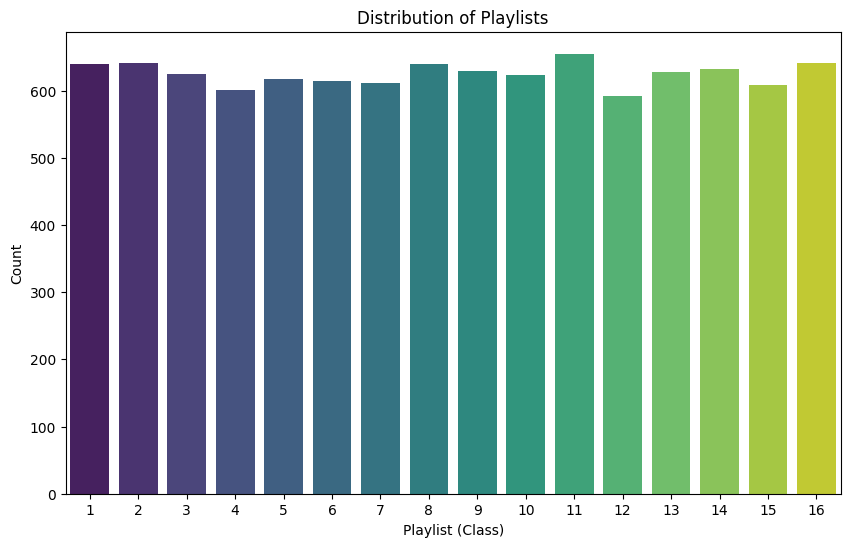

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable (playlist classes)
plt.figure(figsize=(10, 6))
sns.countplot(x='Playlist', data=data, palette='viridis')
plt.title('Distribution of Playlists')
plt.xlabel('Playlist (Class)')
plt.ylabel('Count')
plt.show()

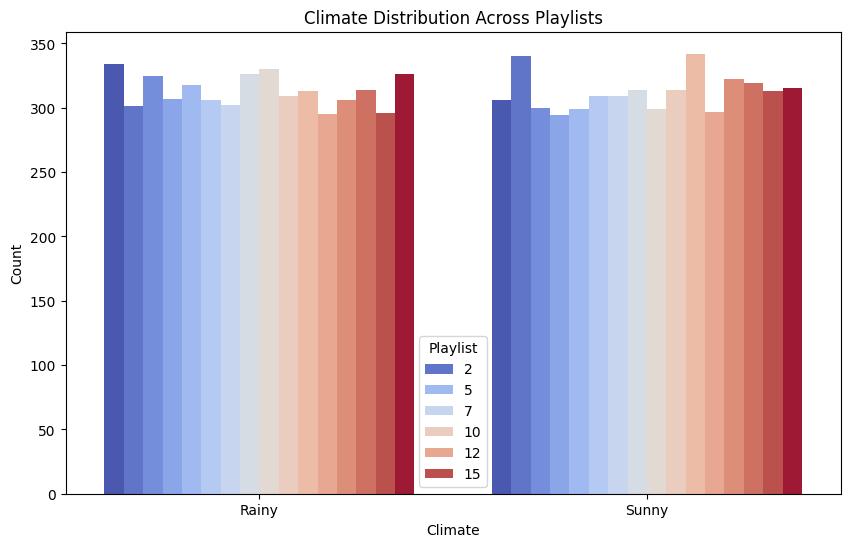

In [8]:
# Distribution of 'Climate' vs. Playlists
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', hue='Playlist', data=data, palette='coolwarm')
plt.title('Climate Distribution Across Playlists')
plt.xlabel('Climate')
plt.ylabel('Count')
plt.legend(title='Playlist')
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_4828\2360024627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time', y='Playlist', data=data, palette='Set3')


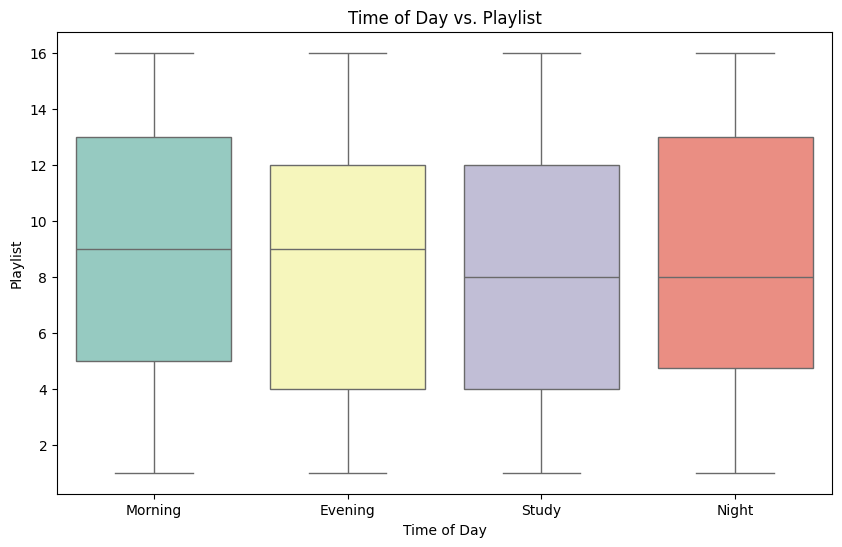

In [9]:
# Time of Day vs. Playlists
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', y='Playlist', data=data, palette='Set3')
plt.title('Time of Day vs. Playlist')
plt.xlabel('Time of Day')
plt.ylabel('Playlist')
plt.show()

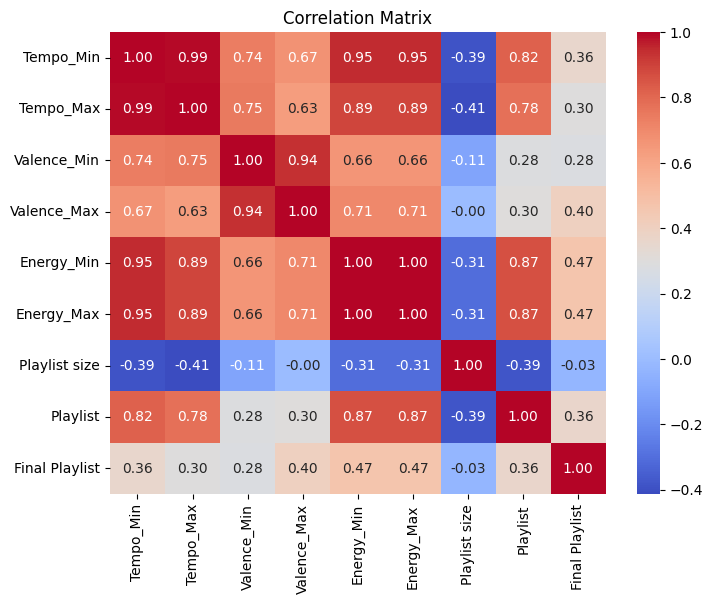

In [10]:
# Correlation matrix (for numerical features only)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_columns) > 1:
    plt.figure(figsize=(8, 6))
    corr_matrix = data[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

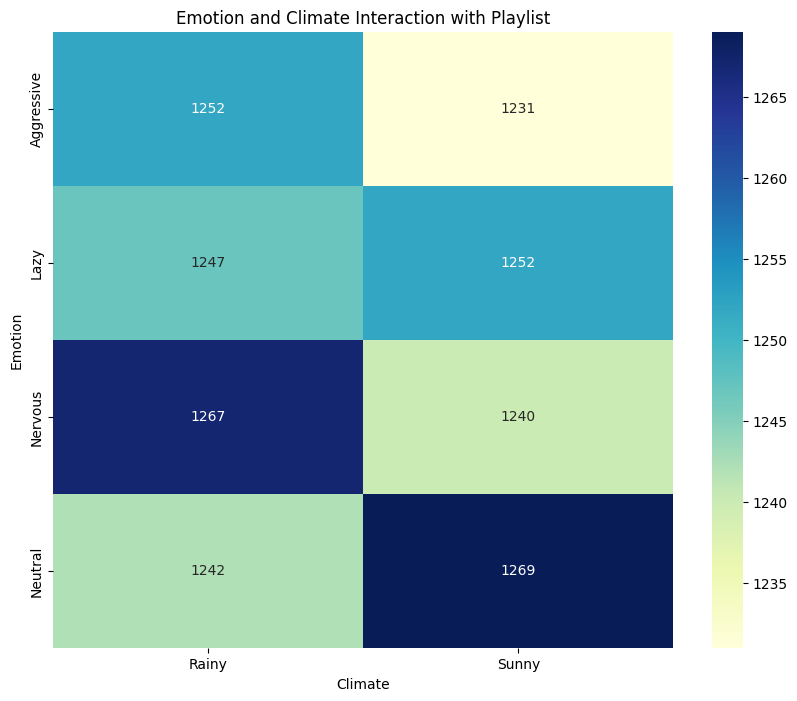

In [11]:
# Interaction Heatmap (Emotion vs. Climate vs. Target)
pivot_table = data.pivot_table(index='Emotion', columns='Weather', values='Playlist', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Emotion and Climate Interaction with Playlist')
plt.ylabel('Emotion')
plt.xlabel('Climate')
plt.show()

In [12]:
categorical_columns = ['Emotion', 'Weather', 'Time']
target_column = 'Final Playlist'

In [13]:
# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [14]:
# Split data into features and target
X = data[categorical_columns]
y = data[target_column]

In [15]:
# Adjust y to start from 0 (if necessary)
y = y - y.min()

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [18]:
best_model = None
best_accuracy = 0
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    
    # Save the best model object
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model  # Save the actual model object

--- Logistic Regression ---
Accuracy: 0.377
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.34      0.46      0.39       140
           2       0.00      0.00      0.00       118
           3       0.00      0.00      0.00       125
           4       0.23      0.46      0.31       125
           5       0.00      0.00      0.00       119
           6       0.00      0.00      0.00       133
           7       0.00      0.00      0.00       125
           8       0.50      0.48      0.49       130
           9       0.51      1.00      0.67       125
          10       0.49      0.50      0.50       129
          11       0.00      0.00      0.00       122
          12       1.00      1.00      1.00        62
          13       1.00      1.00      1.00        67
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        56
          16       0.00      0.00    

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

--- Random Forest ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       140
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00       125
           4       1.00      1.00      1.00       125
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       133
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       130
           9       1.00      1.00      1.00       125
          10       1.00      1.00      1.00       129
          11       1.00      1.00      1.00       122
          12       1.00      1.00      1.00        62
          13       1.00      1.00      1.00        67
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        56
          16       1.00      1.00      1.00  

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       140
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00       125
           4       1.00      1.00      1.00       125
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       133
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       130
           9       1.00      1.00      1.00       125
          10       1.00      1.00      1.00       129
          11       1.00      1.00      1.00       122
          12       1.00      1.00      1.00        62
          13       1.00      1.00      1.00        67
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        56
          16       1.00      1.00      1.00        

In [19]:
# Display the best model
print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy}")


Best Model: RandomForestClassifier(random_state=42) with Accuracy: 1.0


In [20]:
# Cross-validation scores for a deeper evaluation
print("\nCross-validation scores:")
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


Cross-validation scores:
Logistic Regression: Mean Accuracy = 0.3531, Std = 0.0133
Random Forest: Mean Accuracy = 1.0000, Std = 0.0000


c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not u

XGBoost: Mean Accuracy = 1.0000, Std = 0.0000


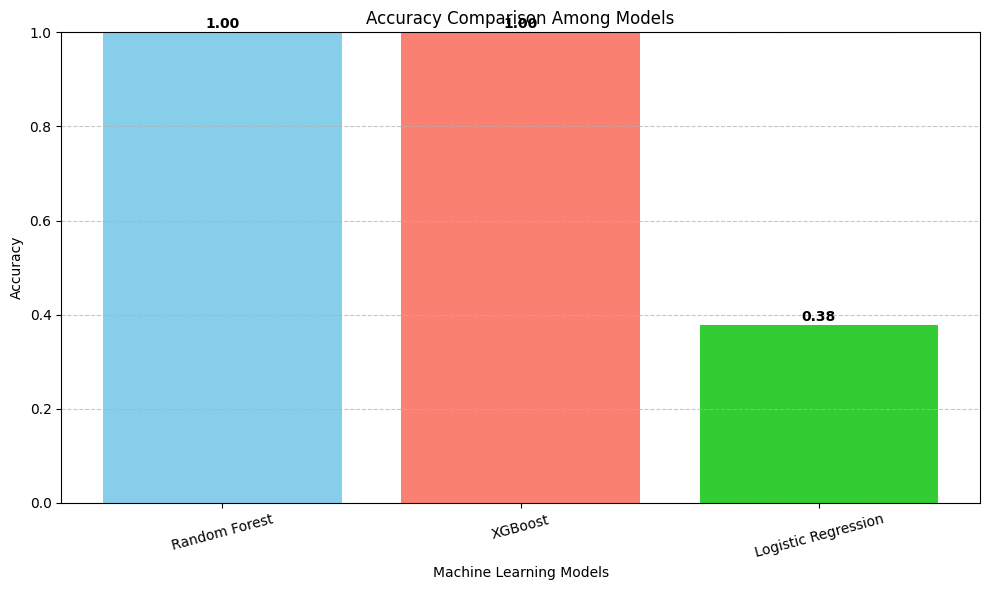

In [21]:
# Convert results to a sorted list for better visualization
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Unpack model names and their accuracies
model_names, accuracies = zip(*sorted_results)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'limegreen'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Among Models')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from imblearn.over_sampling import RandomOverSampler

In [23]:
# Load dataset
data = pd.read_csv('music_recommendation_dataset_with_separate_ranges.csv')

In [24]:
data.head()

,Emotion,Time,Weather,Tempo_Min,Tempo_Max,Valence_Min,Valence_Max,Energy_Min,Energy_Max,Language,Playlist size,Playlist,Final Playlist
0,Nervous,Morning,Rainy,60,90,0.50,0.65,0.4,0.55,English,5,2,5
1,Lazy,Evening,Sunny,100,120,0.66,0.70,0.5,0.60,English,4,12,20
2,Aggressive,Morning,Rainy,70,100,0.45,0.60,0.4,0.55,English,4,6,1
3,Aggressive,Morning,Sunny,70,100,0.45,0.60,0.4,0.55,English,5,7,2
4,Neutral,Evening,Rainy,90,110,0.50,0.65,0.5,0.60,Sinhala,3,16,11


In [25]:
# Define categorical features and target
categorical_columns = ['Emotion', 'Weather', 'Time']
target_column = 'Final Playlist'

In [26]:
# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [27]:
# Split data into features and target
X = data[categorical_columns]
y = data[target_column]

In [28]:
# Adjust y to start from 0 (if necessary)
y = y - y.min()

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Model definition
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train)), activation='softmax')  # Adjust for categorical labels
])

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
    metrics=['accuracy']
)

# Train with Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5854 - loss: 1.3162 - val_accuracy: 1.0000 - val_loss: 0.5111
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9761 - loss: 0.1360 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0563 - val_accuracy: 1.0000 - val_loss: 9.3694e-04
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9944 - loss: 0.0282 - val_accuracy: 1.0000 - val_loss: 4.7391e-04
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9928 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 1.8439e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9945 - loss: 0.0223 - val_accuracy: 1.0000 - val_loss: 6.6085e-05
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 4.4852e-05
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9955 - loss: 0.017

In [32]:
# Evaluate test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.6183e-05
Test Accuracy: 1.0000


In [33]:
import joblib

# Save model and encoders
model.save('playlist_model.h5')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [34]:
import joblib
import numpy as np
import tensorflow as tf

def load_model_and_encoders():
    # Load the trained model and encoders
    model = tf.keras.models.load_model('playlist_model.h5')
    scaler = joblib.load('scaler.pkl')
    label_encoders = joblib.load('label_encoders.pkl')  # Ensure this matches saved file
    return model, scaler, label_encoders

def predict_playlist(emotion, weather, time):
    # Load the trained model and encoders
    model, scaler, label_encoders = load_model_and_encoders()

    # Encode input
    emotion_encoded = label_encoders['Emotion'].transform([emotion])[0]
    weather_encoded = label_encoders['Weather'].transform([weather])[0]
    time_encoded = label_encoders['Time'].transform([time])[0]

    # Prepare input for prediction
    input_features = np.array([[emotion_encoded, weather_encoded, time_encoded]])

    # Scale the input features
    scaled_input = scaler.transform(input_features)

    # Make prediction
    prediction = model.predict(scaled_input)
    predicted_class = np.argmax(prediction, axis=1)[0] + 1  # Adjusting index to match playlist number

    return predicted_class

# Example usage
predicted_playlist = predict_playlist("Neutral", "Sunny", "Morning")
print(f"Recommended Playlist: {predicted_playlist}")


c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Recommended Playlist: 10
